In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
maldf = pd.read_csv("nsl-multiclass-results.csv")
print('size of malware results', len(maldf))

size of malware results 54191


In [3]:
maldf.columns

Index(['dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc'], dtype='object')

In [4]:
maldf.iloc[maldf['accuracy'].idxmax()]

dimred                      none
modeltype    dtree_gini_best_8_4
accuracy                0.762598
precision               0.816223
recall                  0.762598
f1                      0.723142
mcc                     0.653463
Name: 9187, dtype: object

In [5]:
maldf.sort_values('mcc').tail(10)

,dimred,modeltype,accuracy,precision,recall,f1,mcc
9172,none,dtree_gini_best_2_1,0.754214,0.772666,0.754214,0.705513,0.639363
19445,pca_with_varthresh_0.93_autoencoder_2_6,dtree_entropy_random_8_2,0.756920,0.686465,0.756920,0.705551,0.639674
9183,none,dtree_gini_best_6_4,0.751686,0.800946,0.751686,0.703585,0.640087
9185,none,dtree_gini_best_8_2,0.754480,0.793248,0.754480,0.705998,0.641928
9174,none,dtree_gini_best_2_3,0.753149,0.808719,0.753149,0.707224,0.642422
9221,none,dtree_entropy_random_2_2,0.750754,0.819936,0.750754,0.714789,0.642582
9177,none,dtree_gini_best_4_2,0.756166,0.806736,0.756166,0.709304,0.644231
9182,none,dtree_gini_best_6_3,0.756343,0.799394,0.756343,0.707705,0.644309
9178,none,dtree_gini_best_4_3,0.760468,0.780115,0.760468,0.721412,0.648953
9187,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463


In [6]:
maldf = maldf[~(maldf['modeltype']=='svm_poly')]

# Autoencoder variable tuning

In [7]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))

number of autoencoded 53235


In [8]:
autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

/tmp/ipykernel_2972027/1762034384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
/tmp/ipykernel_2972027/1762034384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [9]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

bayesian
dtree
svm
nn


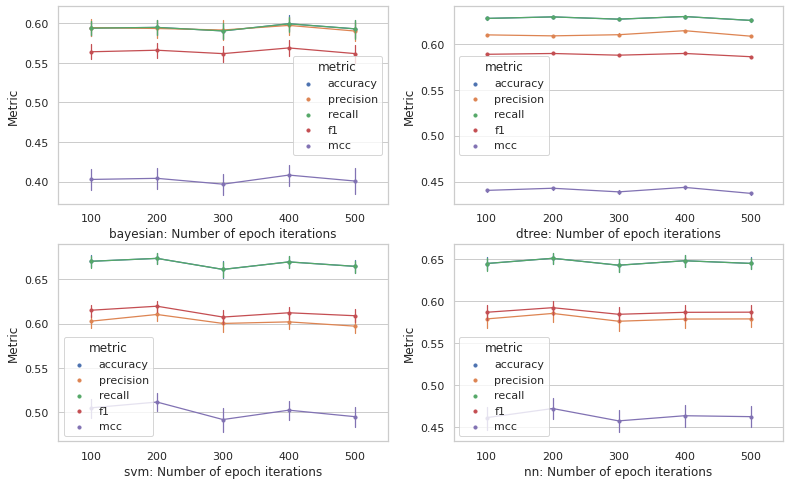

In [10]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='epochs',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of epoch iterations', ylabel='Metric')

In [11]:
autos.groupby('epochs').mean()

,accuracy,precision,recall,f1,mcc
epochs,,,,,
100,0.628315,0.608361,0.628315,0.588540,0.441518
200,0.630127,0.607666,0.630127,0.589629,0.444170
300,0.627309,0.608346,0.627309,0.587401,0.439587
400,0.630419,0.612647,0.630419,0.589415,0.444699
500,0.626199,0.606905,0.626199,0.585956,0.438355


In [12]:
#maldf = maldf[~(maldf['dimred'].str.contains('autoencoder') & ~maldf['dimred'].str.contains('coder_4'))]

In [13]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))
autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

number of autoencoded 53235


/tmp/ipykernel_2972027/1871244389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
/tmp/ipykernel_2972027/1871244389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [14]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

bayesian
dtree
svm
nn


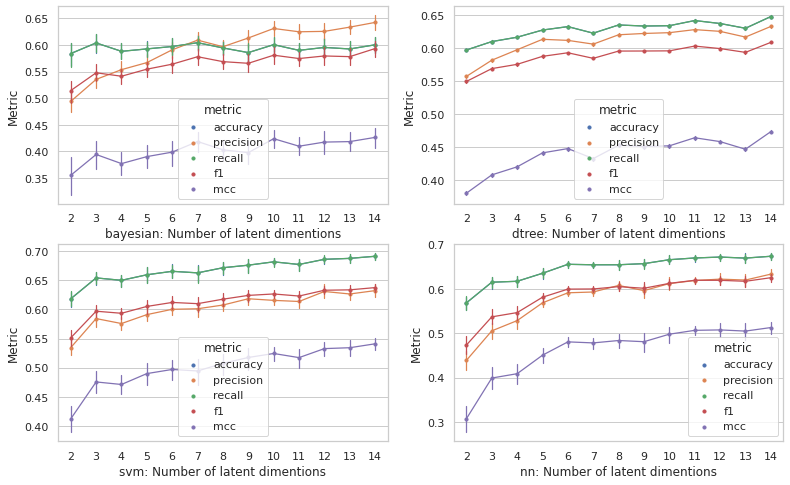

In [15]:
fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='latdim',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of latent dimentions', ylabel='Metric')

In [16]:
autos.groupby('latdim').mean()

,accuracy,precision,recall,f1,mcc,epochs
latdim,,,,,,
10,0.634861,0.622676,0.634861,0.596331,0.454053,300.0
11,0.642083,0.627117,0.642083,0.603176,0.465485,300.0
12,0.638164,0.625037,0.638164,0.599878,0.460417,300.0
13,0.631293,0.616914,0.631293,0.594397,0.449499,300.0
14,0.648203,0.632582,0.648203,0.609090,0.474928,300.0
2,0.596016,0.551785,0.596016,0.546293,0.377972,300.0
3,0.610308,0.578265,0.610308,0.567753,0.408429,300.0
4,0.616294,0.594002,0.616294,0.573979,0.419888,300.0
5,0.627248,0.610541,0.627248,0.586834,0.441505,300.0


bayesian
dtree
svm
nn


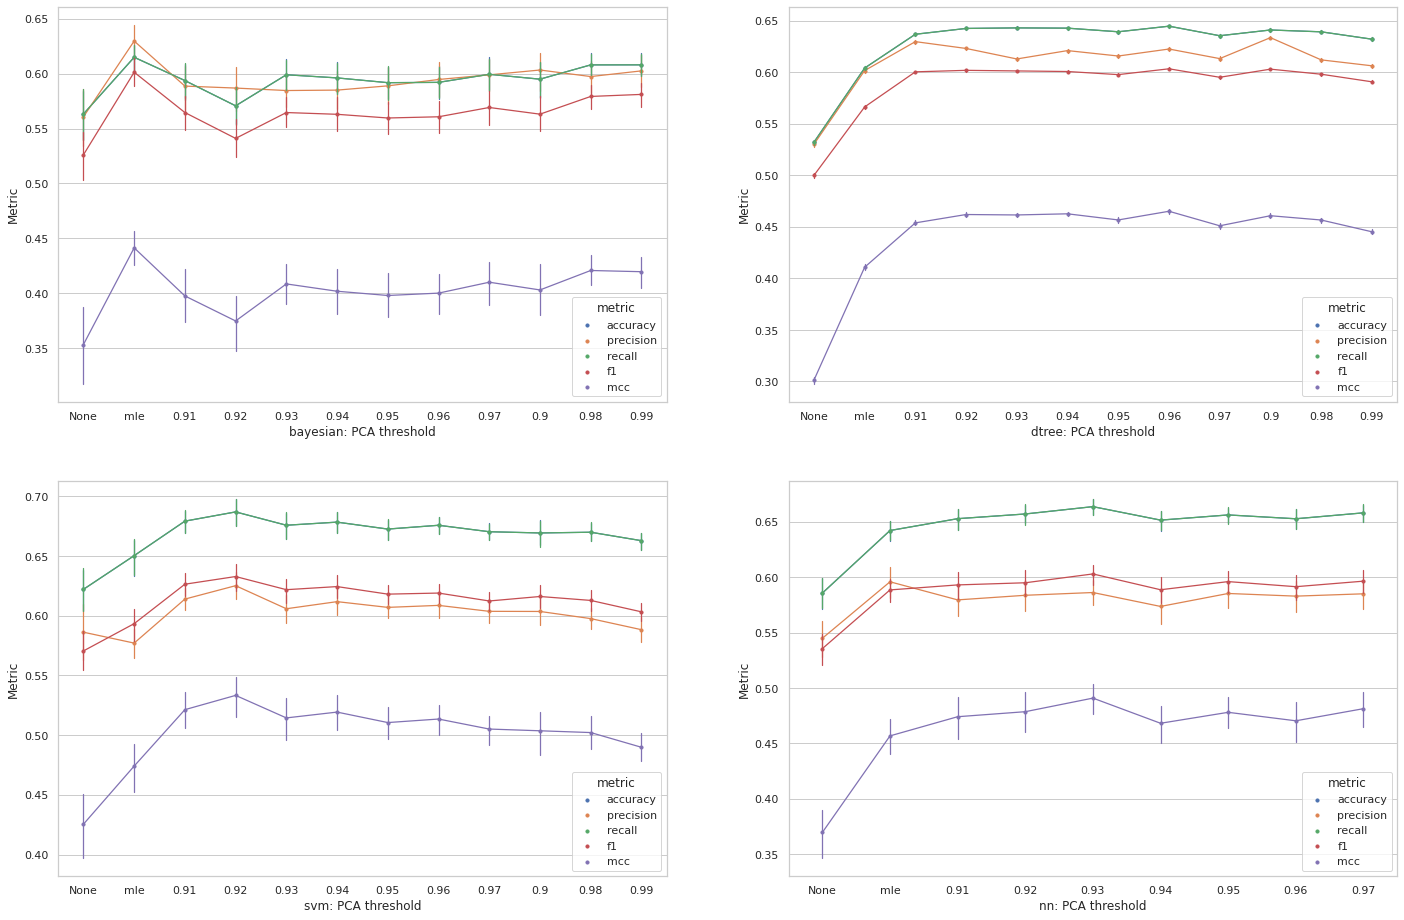

In [17]:
fig = plt.figure(figsize=(24,16))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')

In [18]:
autos.groupby('pca').mean()

,accuracy,precision,recall,f1,mcc,epochs
pca,,,,,,
0.9,0.640741,0.632667,0.640741,0.602596,0.460546,300.0
0.91,0.637550,0.626705,0.637550,0.599938,0.454875,300.0
0.92,0.642750,0.620877,0.642750,0.601125,0.462435,300.0
0.93,0.643772,0.611220,0.643772,0.601124,0.462788,300.0
0.94,0.643005,0.618291,0.643005,0.599983,0.462807,300.0
0.95,0.639804,0.613916,0.639804,0.597368,0.457531,300.0
0.96,0.644738,0.620208,0.644738,0.602435,0.465088,300.0
0.97,0.636402,0.611668,0.636402,0.595044,0.452518,300.0
0.98,0.639225,0.611562,0.639225,0.598025,0.456753,300.0


## PCA


In [19]:
pcas = maldf[maldf.dimred.str.match(r'pca_with_varthresh_[^_]*$')]
print('number of pcad', len(pcas))
pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')

pmelt = pcas.melt(id_vars=['dimred', 'modeltype', 'pca'],
                   var_name='metric', value_name='value')
pcas = maldf[maldf.dimred.str.match(r'pca_with_varthresh_[^_]*$')]
print('number of pcad', len(pcas))
pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')

pmelt = pcas.melt(id_vars=['dimred', 'modeltype', 'pca'],
                   var_name='metric', value_name='value')


number of pcad 756
number of pcad 756


/tmp/ipykernel_2972027/634887023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')
/tmp/ipykernel_2972027/634887023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')


bayesian
dtree
svm
nn


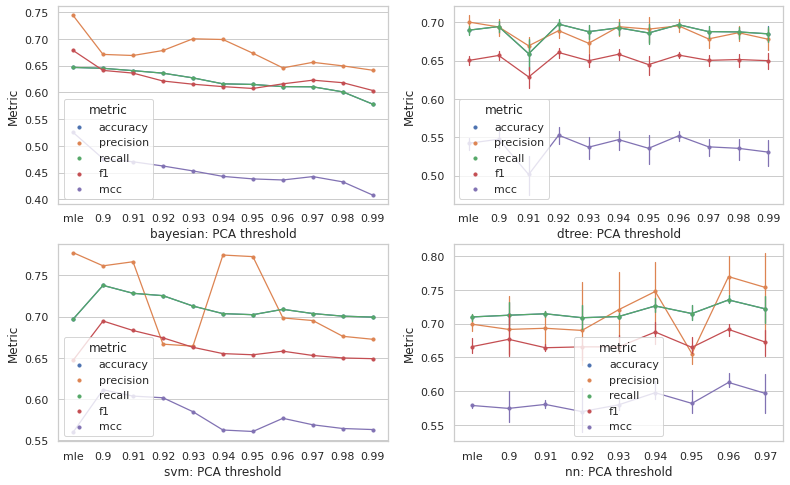

In [20]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=pmelt[pmelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')


# ML metric comparison

## Baysian Network

In [21]:
bayes = maldf[maldf['modeltype'] == 'bayesian']
bayes['drtype'] = bayes['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
bayes

/tmp/ipykernel_2972027/4177646471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes['drtype'] = bayes['dimred']\


,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
0,autoencoder_0_2,bayesian,0.538636,0.491610,0.538636,0.479597,0.286098,autoencoder
70,autoencoder_1_2,bayesian,0.619367,0.511529,0.619367,0.529948,0.419112,autoencoder
140,autoencoder_2_2,bayesian,0.570972,0.453820,0.570972,0.482745,0.327475,autoencoder
210,autoencoder_3_2,bayesian,0.499778,0.379571,0.499778,0.417218,0.186174,autoencoder
280,autoencoder_4_2,bayesian,0.145183,0.177613,0.145183,0.143260,-0.235322,autoencoder
...,...,...,...,...,...,...,...,...
39530,pca_with_varthresh_0.99_autoencoder_0_14,bayesian,0.657425,0.713225,0.657425,0.632498,0.497676,pca_autoencoder
39531,pca_with_varthresh_0.99_autoencoder_1_14,bayesian,0.634759,0.665244,0.634759,0.634807,0.464751,pca_autoencoder
39532,pca_with_varthresh_0.99_autoencoder_2_14,bayesian,0.598385,0.572038,0.598385,0.578318,0.395095,pca_autoencoder
39533,pca_with_varthresh_0.99_autoencoder_3_14,bayesian,0.635335,0.701660,0.635335,0.642312,0.487786,pca_autoencoder


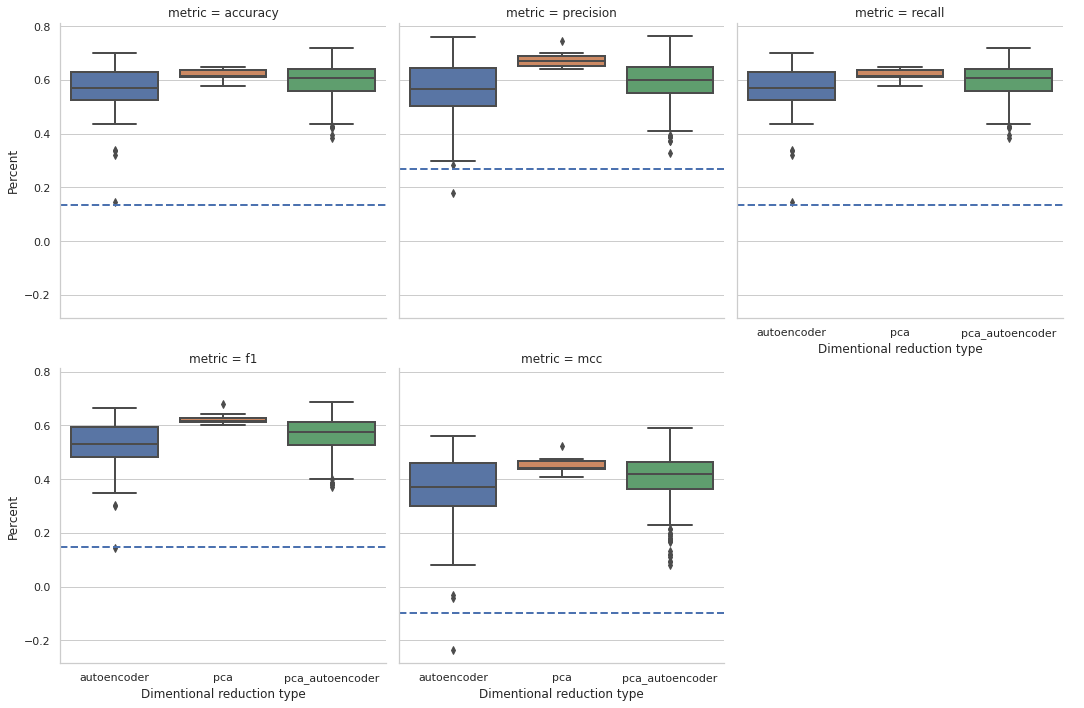

In [22]:
baymelt = bayes[bayes.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
baymelt['value'] = pd.to_numeric(baymelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=baymelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = bayes[bayes.drtype == 'none']
for a in ax.axes:
    b = base[(a.title.get_text().split(' = ')[1])].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [23]:
bayes.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.563238,0.560671,0.563238,0.526092,0.353302
none,0.135380,0.270356,0.135380,0.149372,-0.097764
pca,0.620342,0.674951,0.620342,0.624365,0.453297
pca_autoencoder,0.597145,0.596406,0.597145,0.567947,0.406879


In [24]:
bayes[bayes.groupby('drtype', sort=False)['accuracy'].transform(max) == bayes['accuracy']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
4060,autoencoder_3_13,bayesian,0.699344,0.730050,0.699344,0.665330,0.560505,autoencoder
4550,pca_with_varthresh_mle,bayesian,0.646425,0.743603,0.646425,0.678121,0.525048,pca
9170,none,bayesian,0.135380,0.270356,0.135380,0.149372,-0.097764,none
24973,pca_with_varthresh_0.94_autoencoder_2_10,bayesian,0.717308,0.725816,0.717308,0.681839,0.590013,pca_autoencoder


In [25]:
def calc_diff(x,met):
    samemodel = bayes['modeltype']==x['modeltype']
    basemet = bayes[samemodel & (bayes['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972027/1409954280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


In [26]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca,pca_autoencoder
accuracy_diff,0.427858,0.0,0.484963,0.461766
precision_diff,0.290315,0.0,0.404595,0.326050
recall_diff,0.427858,0.0,0.484963,0.461766
f1_diff,0.376720,0.0,0.474992,0.418575
mcc_diff,0.451066,0.0,0.551061,0.504642


In [27]:
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').max())

                                                 dimred  accuracy_diff
drtype                                                                
autoencoder                             autoencoder_4_9       0.563964
none                                               none       0.000000
pca                              pca_with_varthresh_mle       0.511045
pca_autoencoder  pca_with_varthresh_mle_autoencoder_4_9       0.581929
                                                 dimred  precision_diff
drtype                                                                 
autoencoder                             autoencoder_4_9        0.489430
none                                               none        0.000000
pca                              pca_with_varthresh_mle        0.473247
pca_autoencoder  pca_with_varthresh_mle_autoencoder_4_9        0.492470
                                                 dimred  recall_diff
drtype                                                              
auto

### SVM_RBF

In [28]:
svms = maldf[maldf['modeltype'].str.contains('svm_rbf')]
svms['drtype'] = svms['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
print(svms)

                                         dimred modeltype  accuracy  \
2                               autoencoder_0_2   svm_rbf  0.534466   
72                              autoencoder_1_2   svm_rbf  0.614044   
142                             autoencoder_2_2   svm_rbf  0.555536   
212                             autoencoder_3_2   svm_rbf  0.519606   
282                             autoencoder_4_2   svm_rbf  0.451694   
...                                         ...       ...       ...   
54186  pca_with_varthresh_0.99_autoencoder_0_14   svm_rbf  0.695573   
54187  pca_with_varthresh_0.99_autoencoder_1_14   svm_rbf  0.686923   
54188  pca_with_varthresh_0.99_autoencoder_2_14   svm_rbf  0.656804   
54189  pca_with_varthresh_0.99_autoencoder_3_14   svm_rbf  0.694597   
54190  pca_with_varthresh_0.99_autoencoder_4_14   svm_rbf  0.677874   

       precision    recall        f1       mcc           drtype  
2       0.461802  0.534466  0.461727  0.262071      autoencoder  
72      0.50287

/tmp/ipykernel_2972027/3986701597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms['drtype'] = svms['dimred']\


accuracy
precision
recall
f1
mcc


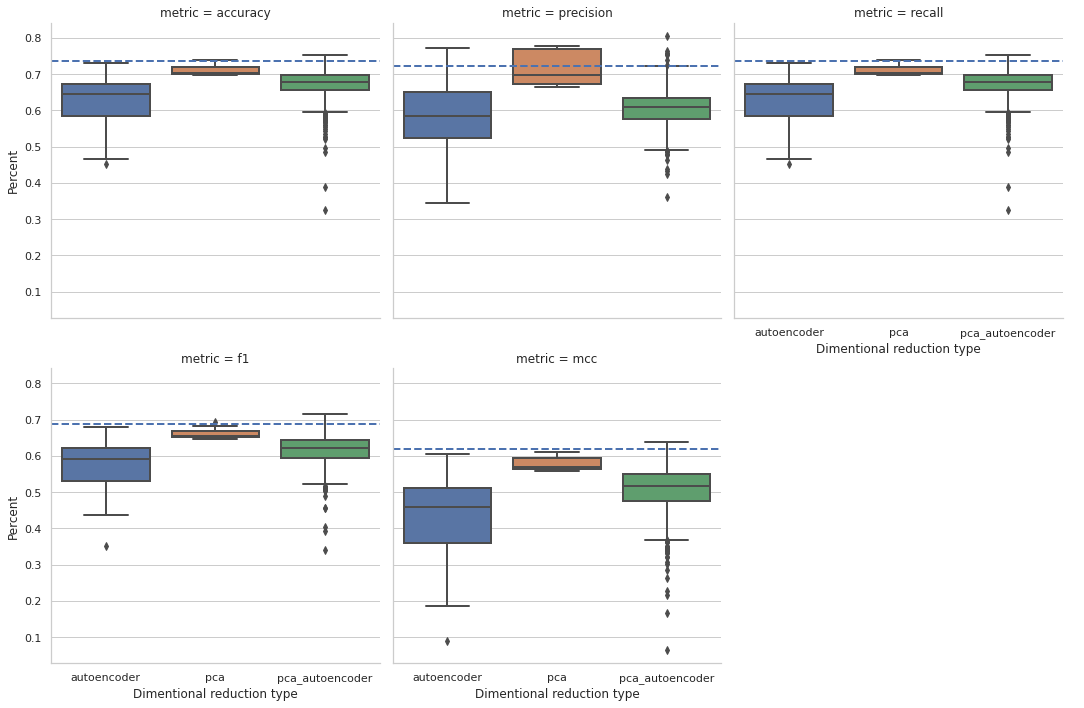

In [29]:
svmmelt = svms[svms.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
svmmelt['value'] = pd.to_numeric(svmmelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=svmmelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = svms[svms.drtype == 'none']
for a in ax.axes:
    print(a.title.get_text().split(' = ')[1])
    b = base[a.title.get_text().split(' = ')[1]].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [30]:
svms.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.622040,0.586167,0.622040,0.570482,0.425416
none,0.735318,0.721507,0.735318,0.686905,0.619100
pca,0.710816,0.720505,0.710816,0.661815,0.577874
pca_autoencoder,0.671880,0.603829,0.671880,0.616350,0.507906


In [31]:
svms[svms.groupby('drtype', sort=False)['mcc'].transform(max) == svms['mcc']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
4062,autoencoder_3_13,svm_rbf,0.729950,0.659580,0.729950,0.678563,0.604440,autoencoder
9171,none,svm_rbf,0.735318,0.721507,0.735318,0.686905,0.619100,none
9240,pca_with_varthresh_0.9,svm_rbf,0.737802,0.761523,0.737802,0.694608,0.611262,pca
53628,pca_with_varthresh_0.92_autoencoder_4_7,svm_rbf,0.750532,0.805002,0.750532,0.715518,0.638702,pca_autoencoder


In [32]:
def calc_diff(x,met):
    samemodel = svms['modeltype']==x['modeltype']
    basemet = svms[samemodel & (svms['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972027/2102562361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


In [33]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(svms[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca,pca_autoencoder
accuracy_diff,-0.113277,0.0,-0.024502,-0.063438
precision_diff,-0.135341,0.0,-0.001002,-0.117678
recall_diff,-0.113277,0.0,-0.024502,-0.063438
f1_diff,-0.116422,0.0,-0.025090,-0.070554
mcc_diff,-0.193684,0.0,-0.041226,-0.111195


## DTs

### variable tuning

In [34]:
dtrees = maldf[maldf['modeltype'].str.contains('dtree')]
dtrees['drtype'] = dtrees['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
dtrees['criterion'] = dtrees.modeltype.str.extract(r'dtree_([^_]*)_')
dtrees['splitter'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_([^_]*)_')
dtrees['min_samples_split'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_([^_]*)_')
dtrees['min_samples_leaf'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_[^_]*_([^_]*)')

print(dtrees)

/tmp/ipykernel_2972027/847068698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['drtype'] = dtrees['dimred']\
/tmp/ipykernel_2972027/847068698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['criterion'] = dtrees.modeltype.str.extract(r'dtree_([^_]*)_')
/tmp/ipykernel_2972027/847068698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

                                         dimred              modeltype  \
3                               autoencoder_0_2    dtree_gini_best_2_1   
4                               autoencoder_0_2    dtree_gini_best_2_2   
5                               autoencoder_0_2    dtree_gini_best_2_3   
6                               autoencoder_0_2    dtree_gini_best_2_4   
7                               autoencoder_0_2    dtree_gini_best_4_1   
...                                         ...                    ...   
52138  pca_with_varthresh_0.99_autoencoder_4_14  dtree_gini_random_6_4   
52139  pca_with_varthresh_0.99_autoencoder_4_14  dtree_gini_random_8_1   
52140  pca_with_varthresh_0.99_autoencoder_4_14  dtree_gini_random_8_2   
52141  pca_with_varthresh_0.99_autoencoder_4_14  dtree_gini_random_8_3   
52142  pca_with_varthresh_0.99_autoencoder_4_14  dtree_gini_random_8_4   

       accuracy  precision    recall        f1       mcc           drtype  \
3      0.441137   0.405851  0.4411

/tmp/ipykernel_2972027/847068698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['min_samples_split'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_([^_]*)_')
/tmp/ipykernel_2972027/847068698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['min_samples_leaf'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_[^_]*_([^_]*)')


<AxesSubplot:xlabel='criterion', ylabel='mcc'>

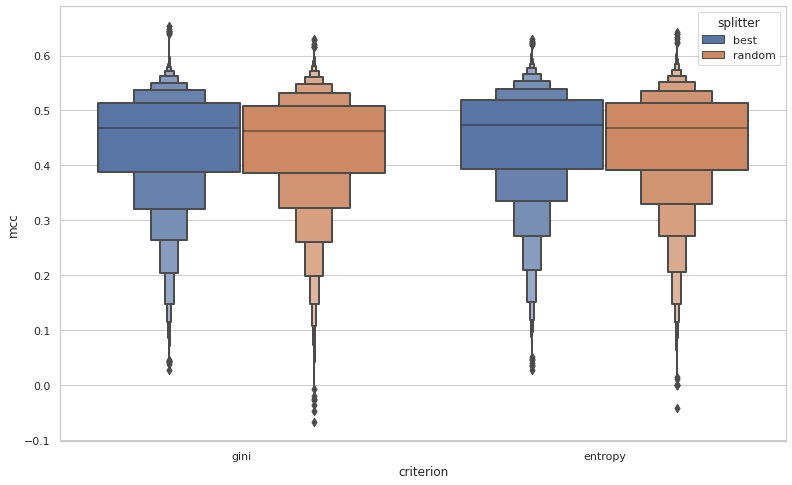

In [35]:
ax = plt.figure(figsize=(13,8))
sns.boxenplot(data=dtrees, x='criterion', y='mcc', hue='splitter')

In [36]:
dtrees.groupby(['criterion', 'splitter']).mean()

accuracy  precision    recall        f1       mcc
criterion splitter                                                   
entropy   best      0.630884   0.617635  0.630884  0.592259  0.447028
          random    0.629616   0.610028  0.629616  0.589220  0.442791
gini      best      0.627859   0.611302  0.627859  0.588880  0.441306
          random    0.626477   0.606580  0.626477  0.586388  0.437480

In [37]:
dtrees[dtrees.groupby(['criterion', 'splitter'])['mcc'].transform(max) == dtrees['mcc']][['criterion', 'splitter', 'dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc']]

,criterion,splitter,dimred,modeltype,accuracy,precision,recall,f1,mcc
9187,gini,best,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463
9203,gini,random,none,dtree_gini_random_8_4,0.742770,0.806887,0.742770,0.697758,0.629296
9206,entropy,best,none,dtree_entropy_best_2_3,0.746008,0.798570,0.746008,0.704365,0.629805
9221,entropy,random,none,dtree_entropy_random_2_2,0.750754,0.819936,0.750754,0.714789,0.642582


In [38]:
dtrees.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.532049,0.530103,0.532049,0.499877,0.301120
none,0.724704,0.753476,0.724704,0.680855,0.600641
pca,0.687702,0.686252,0.687702,0.650734,0.538009
pca_autoencoder,0.636455,0.617425,0.636455,0.596231,0.453276


In [39]:
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(dtrees[dtrees[met] == dtrees[met].max()])

     dimred            modeltype  accuracy  precision    recall        f1  \
9187   none  dtree_gini_best_8_4  0.762598   0.816223  0.762598  0.723142   

           mcc drtype criterion splitter min_samples_split min_samples_leaf  
9187  0.653463   none      gini     best                 8                4  
     dimred                 modeltype  accuracy  precision    recall  \
9221   none  dtree_entropy_random_2_2  0.750754   0.819936  0.750754   

            f1       mcc drtype criterion splitter min_samples_split  \
9221  0.714789  0.642582   none   entropy   random                 2   

     min_samples_leaf  
9221                2  
     dimred            modeltype  accuracy  precision    recall        f1  \
9187   none  dtree_gini_best_8_4  0.762598   0.816223  0.762598  0.723142   

           mcc drtype criterion splitter min_samples_split min_samples_leaf  
9187  0.653463   none      gini     best                 8                4  
     dimred            modeltype  accura

In [40]:
def calc_diff(x,met):
    samemodel = dtrees['modeltype']==x['modeltype']
    basemet = dtrees[samemodel & (dtrees['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    dtrees[met + '_diff'] = dtrees.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972027/1350800160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees[met + '_diff'] = dtrees.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


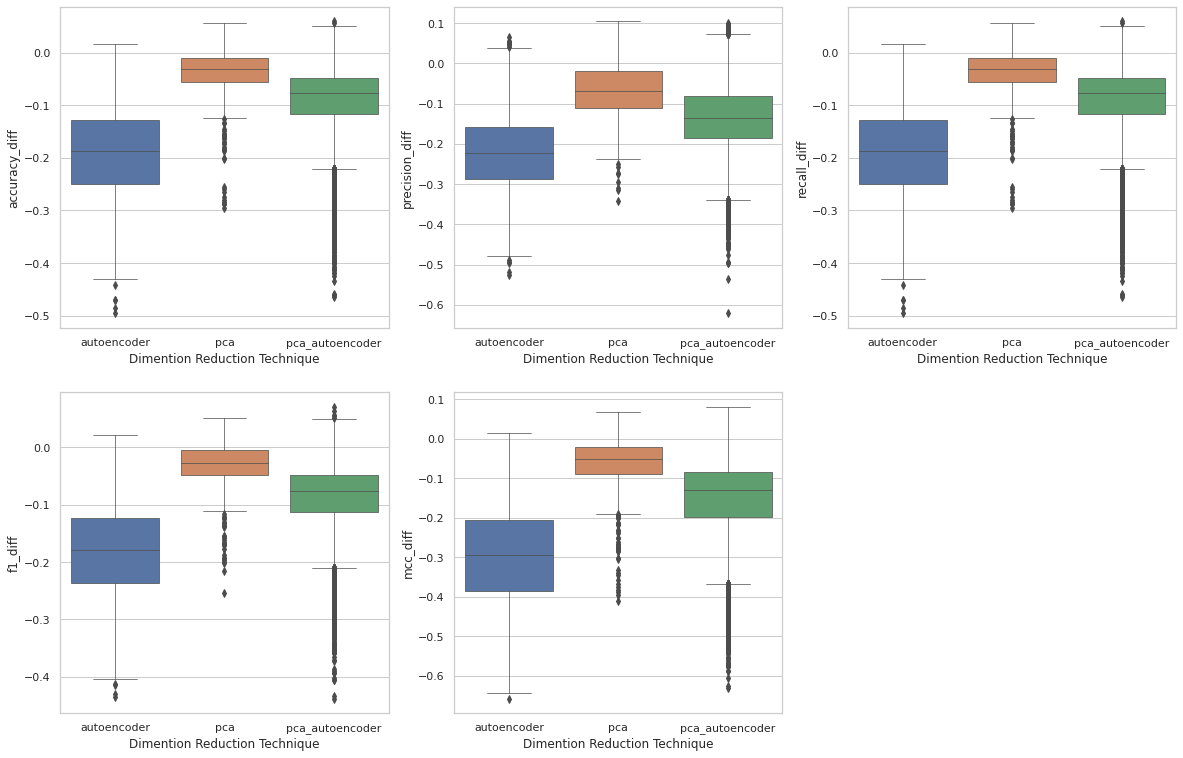

In [41]:
fig = plt.figure(figsize=(20,13))

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
for i in range(5):
    met = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=dtrees[dtrees['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    

In [42]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(dtrees[dtrees[met] == dtrees[met].max()])

agg

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,criterion,splitter,min_samples_split,min_samples_leaf,accuracy_diff,precision_diff,recall_diff,f1_diff,mcc_diff
9187,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463,none,gini,best,8,4,0.0,0.0,0.0,0.0,0.0
9221,none,dtree_entropy_random_2_2,0.750754,0.819936,0.750754,0.714789,0.642582,none,entropy,random,2,2,0.0,0.0,0.0,0.0,0.0
9187,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463,none,gini,best,8,4,0.0,0.0,0.0,0.0,0.0
9187,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463,none,gini,best,8,4,0.0,0.0,0.0,0.0,0.0
9187,none,dtree_gini_best_8_4,0.762598,0.816223,0.762598,0.723142,0.653463,none,gini,best,8,4,0.0,0.0,0.0,0.0,0.0


# Neural Nets

In [43]:
nns = maldf[maldf['modeltype'].str.contains('nn')]
nns['drtype'] = nns['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
nns['layers'] = nns.modeltype.str.extract(r'nn_([^_]*)')

print(nns)

                                         dimred modeltype  accuracy  \
67                              autoencoder_0_2      nn_1  0.514283   
68                              autoencoder_0_2      nn_3  0.545334   
69                              autoencoder_0_2      nn_5  0.508783   
137                             autoencoder_1_2      nn_1  0.629258   
138                             autoencoder_1_2      nn_3  0.619855   
...                                         ...       ...       ...   
53527  pca_with_varthresh_0.97_autoencoder_4_14      nn_3  0.687633   
53528  pca_with_varthresh_0.97_autoencoder_4_14      nn_5  0.693000   
53529                   pca_with_varthresh_0.91      nn_1  0.707860   
53530                   pca_with_varthresh_0.91      nn_3  0.715312   
53531                   pca_with_varthresh_0.91      nn_5  0.720990   

       precision    recall        f1       mcc           drtype layers  
67      0.404351  0.514283  0.420794  0.223500      autoencoder      1  
6

/tmp/ipykernel_2972027/696213306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns['drtype'] = nns['dimred']\
/tmp/ipykernel_2972027/696213306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns['layers'] = nns.modeltype.str.extract(r'nn_([^_]*)')


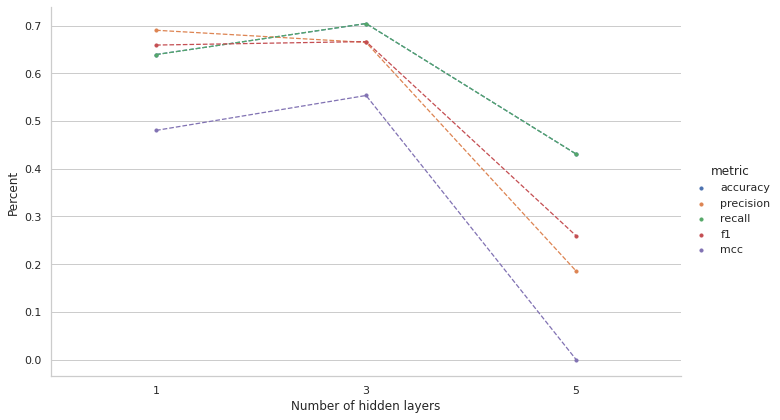

In [44]:
nnmelt = nns[nns.drtype == 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype', 'layers'],
                     var_name='metric', value_name='value')
nnmelt['value'] = pd.to_numeric(nnmelt['value'])

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=nnmelt,
                 x='layers',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='Number of hidden layers', ylabel='Percent')

In [45]:
nns[nns.drtype == 'none'].groupby('layers').mean()

,accuracy,precision,recall,f1,mcc
layers,,,,,
1,0.639150,0.690096,0.639150,0.659089,0.480189
3,0.704223,0.664639,0.704223,0.666398,0.553380
5,0.430758,0.185552,0.430758,0.259376,0.000000


In [46]:
nns[nns['accuracy'] == nns['accuracy'].max()]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers
52266,pca_with_varthresh_0.91_autoencoder_0_10,nn_1,0.744721,0.67198,0.744721,0.694759,0.62806,pca_autoencoder,1


In [47]:
nns[nns.groupby('layers', sort=False)['mcc'].transform(max) == nns['mcc']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers
52266,pca_with_varthresh_0.91_autoencoder_0_10,nn_1,0.744721,0.671980,0.744721,0.694759,0.628060,pca_autoencoder,1
52868,pca_with_varthresh_0.94_autoencoder_2_10,nn_5,0.741749,0.795373,0.741749,0.691779,0.621222,pca_autoencoder,5
53134,pca_with_varthresh_0.96,nn_3,0.741749,0.800820,0.741749,0.692235,0.626388,pca,3


In [48]:
nns.groupby('modeltype', sort=False).mean()

,accuracy,precision,recall,f1,mcc
modeltype,,,,,
nn_1,0.652755,0.586247,0.652755,0.594049,0.473918
nn_3,0.650763,0.588856,0.650763,0.594313,0.472290
nn_5,0.639788,0.570271,0.639788,0.578205,0.448774


In [49]:
def calc_diff(x,met):
    samemodel = nns['modeltype']==x['modeltype']
    basemet = nns[samemodel & (nns['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    nns[met + '_diff'] = nns.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972027/1221263587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns[met + '_diff'] = nns.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


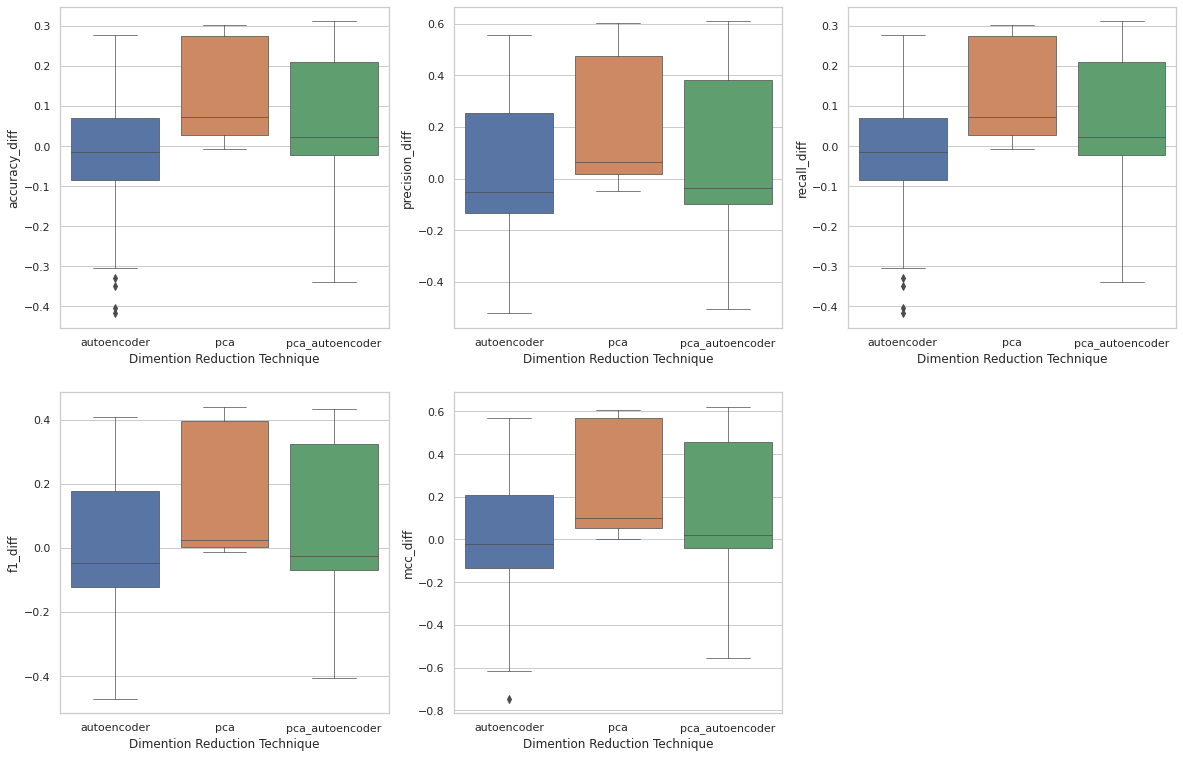

In [50]:
fig = plt.figure(figsize=(20,13))
for i in range(5):
    met = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=nns[nns['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    

In [51]:
nns[nns.groupby('drtype', sort=False)['accuracy'].transform(max) == nns['accuracy']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers,accuracy_diff,precision_diff,recall_diff,f1_diff,mcc_diff
4127,autoencoder_3_13,nn_1,0.736293,0.731255,0.736293,0.698767,0.607521,autoencoder,1,0.097143,0.041159,0.097143,0.039678,0.127332
9237,none,nn_3,0.704223,0.664639,0.704223,0.666398,0.553380,none,3,0.000000,0.000000,0.000000,0.000000,0.000000
52266,pca_with_varthresh_0.91_autoencoder_0_10,nn_1,0.744721,0.671980,0.744721,0.694759,0.628060,pca_autoencoder,1,0.105571,-0.018117,0.105571,0.035669,0.147871
53134,pca_with_varthresh_0.96,nn_3,0.741749,0.800820,0.741749,0.692235,0.626388,pca,3,0.037527,0.136180,0.037527,0.025837,0.073008
